In [ ]:
pip install streamlit

In [2]:
from sklearn.datasets import load_iris
from sklearn import tree

1. Support Vector Machine
2. Naive Bayes
3. Decision Tree
4. Local Outlier Factor
5. Isolation Forest
6. Logistic Regression
>7. Exit
Enter a number5
Isolation Forest
[[ 15  13]
 [ 10 533]]
              precision    recall  f1-score   support

        -1.0       0.60      0.54      0.57        28
         1.0       0.98      0.98      0.98       543

    accuracy                           0.96       571
   macro avg       0.79      0.76      0.77       571
weighted avg       0.96      0.96      0.96       571



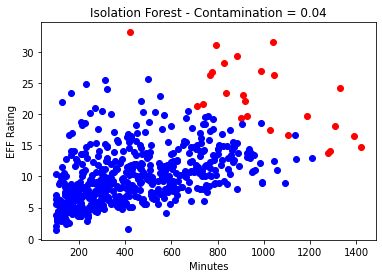

        ilkid firstname lastname leag   gp  ...  fgm  fta  ftm  tpa  tpm
287  BONDWA01    Walter     Bond    N  153  ...  329  227  174  137   41

[1 rows x 21 columns]
1. Support Vector Machine
2. Naive Bayes
3. Decision Tree
4. Local Outlier Factor
5. Isolation Forest
6. Logistic Regression
>7. Exit
Enter a number6
Linear Regression
[[543   0]
 [  4  24]]
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00       543
         1.0       1.00      0.86      0.92        28

    accuracy                           0.99       571
   macro avg       1.00      0.93      0.96       571
weighted avg       0.99      0.99      0.99       571



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


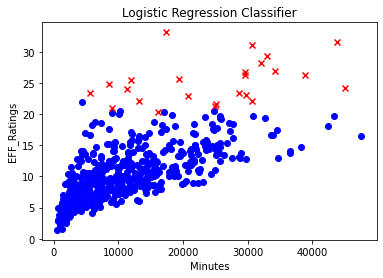

        ilkid firstname lastname leag   gp  ...  fgm  fta  ftm  tpa  tpm
287  BONDWA01    Walter     Bond    N  153  ...  329  227  174  137   41

[1 rows x 21 columns]
1. Support Vector Machine
2. Naive Bayes
3. Decision Tree
4. Local Outlier Factor
5. Isolation Forest
6. Logistic Regression
>7. Exit
Enter a number7


In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import LocalOutlierFactor
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import IsolationForest
from sklearn.linear_model import LogisticRegression

def read_file(filename):
    df = pd.read_csv('/content/' + filename)
    return df

def convertLabels(array):
    convertedarray = np.ones(len(array))
    for x in range(len(array)):
        if(array[x] == 1):
            convertedarray[x] = (-1)
    return convertedarray   
    

def DecisionTree(X_train, X_test, y_train, y_test):
    dtClassifier = DecisionTreeClassifier(criterion = "entropy",random_state = 100,max_depth=1) 
    dtClassifier.fit(X_train, y_train)
    y_pred = dtClassifier.predict(X_test)
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    for ind in range (X_test.shape[0]):
        if(y_pred[ind] == 1):
            plt.scatter(X_test[ind,1], X_test[ind,12], color = 'red', marker="x")
            plt.xlabel('Minutes')   
            plt.ylabel('EFF_Rating')
        else:
            plt.scatter(X_test[ind,1], X_test[ind,12], color = 'blue')
            plt.xlabel('Minutes')
            plt.ylabel('EFF_Ratings') 
    plt.title("Decision Tree Classifier")
    plt.show()
    

def Logistic_Reg(X_train, X_test, y_train, y_test):
    logreg = LogisticRegression()
    logreg.fit(X_train,y_train)
    y_pred=logreg.predict(X_test)
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    for ind in range (X_test.shape[0]):
        if(y_pred[ind] == 1):
            plt.scatter(X_test[ind,1], X_test[ind,12], color = 'red', marker="x")
            plt.xlabel('Minutes')   
            plt.ylabel('EFF_Rating')
        else:
            plt.scatter(X_test[ind,1], X_test[ind,12], color = 'blue')
            plt.xlabel('Minutes')
            plt.ylabel('EFF_Ratings') 
    plt.title("Logistic Regression Classifier")
    plt.show()

    
def SupervisedSVM(df, X_train, X_test, y_train, y_test):
    svclassifier = SVC(kernel='linear', C = 0.002, gamma = 0.002)
    svclassifier.fit(X_train, y_train)
    y_pred = svclassifier.predict(X_test)
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    for ind in range (X_test.shape[0]):
        if(y_pred[ind] == 1):
            plt.scatter(X_test[ind,1], X_test[ind,12], color = 'red', marker="x")
            plt.xlabel('Minutes')   
            plt.ylabel('EFF_Rating')
        else:
            plt.scatter(X_test[ind,1], X_test[ind,12], color = 'blue')
            plt.xlabel('Minutes')
            plt.ylabel('EFF_Ratings') 
    plt.title("Support Vector Machine")
    plt.show()
    
def LocalOutlier(X_train, X_test, y_test):
    y = convertLabels(y_test)   
    LOFClassifier = LocalOutlierFactor(n_neighbors=500, algorithm='auto', contamination=0.13, novelty=True) 
    LOFClassifier.fit(X_train)
    y_pred = LOFClassifier.predict(X_test)
    print(confusion_matrix(y,y_pred))
    print(classification_report(y,y_pred))
    for ind in range (X_test.shape[0]):
        if(y_pred[ind] == -1):
            plt.scatter(X_test[ind,0], X_test[ind,12] ,color = 'red')
            plt.xlabel('Minutes')   
            plt.ylabel('EFF Rating')
        else:
            plt.scatter(X_test[ind,0], X_test[ind,12], color = 'blue')
            plt.xlabel('Minutes')
            plt.ylabel('EFF Rating') 
    plt.title("Local Outlier Factor - Contamination = 0.04")
    plt.show()
    
def GuassianNB(X_train, X_test, y_train ,y_test):
   gnb = GaussianNB(var_smoothing=1e-9)
   gnb.fit(X_train, y_train)
   y_pred = gnb.predict(X_test)
   print(confusion_matrix(y_test,y_pred))
   print(classification_report(y_test,y_pred))
   for ind in range (X_test.shape[0]):
        if(y_pred[ind] == 1):
            plt.scatter(X_test[ind,1], X_test[ind,12], color = 'red', marker="x")
            plt.xlabel('Minutes')   
            plt.ylabel('EFF_Rating')
        else:
            plt.scatter(X_test[ind,1], X_test[ind,12], color = 'blue')
            plt.xlabel('Minutes')
            plt.ylabel('EFF_Ratings') 
   plt.title("Naive Bayes Classifier")
   plt.show()
   
   

def IsoForest(X_train, X_test, y_test):
   y = convertLabels(y_test)
   isf = IsolationForest(n_estimators=100,  contamination=0.05)
   isf.fit(X_train)
   y_pred = isf.predict(X_test)
   print(confusion_matrix(y,y_pred))
   print(classification_report(y,y_pred))
   for ind in range (X_test.shape[0]):
        if(y_pred[ind] == -1):
            plt.scatter(X_test[ind,0], X_test[ind,12] ,color = 'red')
            plt.xlabel('Minutes')   
            plt.ylabel('EFF Rating')
        else:
            plt.scatter(X_test[ind,0], X_test[ind,12], color = 'blue')
            plt.xlabel('Minutes')
            plt.ylabel('EFF Rating') 
   plt.title("Isolation Forest - Contamination = 0.04")
   plt.show()

def Print_Outliers(dataset):
    for ind in range(dataset.shape[0]):
        if(dataset.iat[ind, 20] == 1):
            print(dataset.iat[ind, 0], "  -  ", dataset.iat[ind, 1], ".",dataset.iat[ind, 2])


dataframe=read_file('player_regular_season_career.csv')
career_data = read_file('player_regular_season_career.csv')
data = read_file('player_regular_season.csv')
career_data = career_data.drop(['oreb', 'dreb'], axis=1)
#Removes all datapoints with Games Played<100 and Minutes Played<500
career_data = career_data[career_data['minutes'] > 500]
career_data = career_data[career_data['gp'] > 100]

#Adds the starting year of each player according to the league
starting_year = np.zeros(career_data.shape[0])
for ind in range(career_data.shape[0]):
    identity = career_data.iat[ind,0]
    league = career_data.iat[ind,3]
    rows = data.loc[(data['ilkid'] == str(identity)) & (data['leag'] == str(league))]
    starting_year[ind] = rows.iat[0, 1]

career_data.insert(19, "year", starting_year)

#Re-Indexes the data
career_data = career_data.reset_index(drop=True)


#Determining Ground Truth Labels
EFF_Rating = np.zeros(career_data.shape[0])
for ind in range(career_data.shape[0]):
    EFF_Rating[ind] = ((career_data.iat[ind,6]+career_data.iat[ind,7]+career_data.iat[ind,8]+career_data.iat[ind,9]+career_data.iat[ind,10])-(career_data.iat[ind,11]+(career_data.iat[ind,13]-career_data.iat[ind,14])+(career_data.iat[ind,15]-career_data.iat[ind,16])))/career_data.iat[ind,4]
    
#print(GroundTruthLabels
sorted_score = np.sort(EFF_Rating)
sorted_score = sorted_score[::-1]  #Sorting the array of scores in descending order

# Top 100 = 20.19; top 50 = 23.096715328467152
# Creating our class labels (1 = Outlier; 0 = Inlier) 
y_label = np.zeros(career_data.shape[0]) 
for x in range(career_data.shape[0]):
    if (EFF_Rating[x] > 20.19):
       y_label[x] = 1     
#Inserting the EFF_Rating as a column into the dataset
career_data.insert(20, "EFF", EFF_Rating)
#Dropping all features that are not required
training_dataset = career_data.drop(['ilkid','firstname','leag','lastname','pf','tpa','tpm','year'], axis = 1)
training_dataset = training_dataset.values



X_train, X_test, y_train, y_test = train_test_split(training_dataset, y_label, test_size = 0.30, random_state=5)

input_val = 0
while input_val < 7:
    print("1. Support Vector Machine")
    print("2. Naive Bayes")
    print("3. Decision Tree")
    print("4. Local Outlier Factor")
    print("5. Isolation Forest")
    print("6. Logistic Regression")
    print(">7. Exit")
    input_val = int(input("Enter a number"))
    if (input_val == 1):
        print("Support Vector Machine")
        SupervisedSVM(career_data, X_train, X_test, y_train, y_test)
        
        max_index = np.argmax(EFF_Rating)
        print(dataframe.loc[[max_index]])
        
    elif(input_val == 2):
        print("Naive Bayes")
        GuassianNB(X_train, X_test, y_train ,y_test)
        '''
        sorted = career_data.sort_values(by=['pts'], ascending=False)
        print(sorted.head(1))'''
        max_index = np.argmax(EFF_Rating)
        print(dataframe.loc[[max_index]])
    elif(input_val == 3):
        print("Decision Tree")
        DecisionTree(X_train, X_test, y_train, y_test)
        max_index = np.argmax(EFF_Rating)
        print(dataframe.loc[[max_index]])
    elif(input_val == 4):
         print("Local Outlier Factor")
         LocalOutlier(X_train, X_test, y_test)
         max_index = np.argmax(EFF_Rating)
         print(dataframe.loc[[max_index]])
    elif(input_val == 5):
        print("Isolation Forest")
        IsoForest(X_train, X_test, y_test)
        max_index = np.argmax(EFF_Rating)
        print(dataframe.loc[[max_index]])
    elif(input_val == 6):
        print("Linear Regression")
        Logistic_Reg(X_train, X_test,y_train, y_test)
        max_index = np.argmax(EFF_Rating)
        print(dataframe.loc[[max_index]])
    